In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
import csv
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#导入数据
data=data = pd.read_csv("E:/ELEC3D_for_Chen/train_data.csv")

In [6]:
#查看
data.head()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
0,0.077249,4.000000,15.000000,11.000000,9.666667,9.483417,5.795143,0.611082,0.007080,-1.222705,1.901743,11986.0,4000.0
1,0.075093,5.000000,14.333333,9.333333,10.000000,9.545917,5.722319,0.599452,-0.013571,-1.189178,1.910220,11968.0,4000.0
2,0.077239,4.333333,14.666667,10.333333,9.666667,9.522583,5.765345,0.605439,-0.004310,-1.212922,1.906275,11972.0,4000.0
3,0.077881,4.333333,14.666667,10.333333,9.666667,9.538583,5.770752,0.604990,-0.009660,-1.204863,1.903251,11996.0,4000.0
4,0.077418,5.000000,14.666667,9.666667,10.000000,9.545917,5.773821,0.604847,-0.006533,-1.208783,1.881173,12152.0,4000.0


In [7]:
#分割标签和特征项
y = data['label'].copy()
#X = data[['Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value','standard_deviation',
#                     'Dispersion_coefficient','skewness','kurtosis','mean_width','surface']].copy()
X = data[['average_value','standard_deviation','Dispersion_coefficient','mean_width','surface']].copy()

In [55]:
#分割训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
#查看是否缺失
X_train.isnull().any().describe()

count         5
unique        1
top       False
freq          5
dtype: object

In [57]:
#归一化处理
X=(X- X.min()) / (X.max() - X.min())
X_train = (X_train- X.min()) / (X.max() - X.min())
X_test=(X_test- X.min()) / (X.max() - X.min())

In [58]:
X_test

,average_value,standard_deviation,Dispersion_coefficient,mean_width,surface
9394,0.598575,0.448946,0.413797,0.371218,0.714032
898,0.728325,0.435531,0.309178,0.398947,0.706927
2398,0.425178,0.418224,0.528530,0.445336,0.559503
5906,0.548397,0.573203,0.518691,0.802009,0.248668
2343,0.483967,0.699256,0.635733,0.535649,0.566607
8225,0.600950,0.690095,0.541869,0.331305,0.733570
5506,0.494952,0.490908,0.514806,0.532521,0.525755
6451,0.304038,0.408905,0.615985,0.642600,0.298401
2670,0.378563,0.536712,0.628281,0.554439,0.468917
3497,0.608967,0.326690,0.340147,0.346637,0.776199


In [12]:
#定义rmse，mae，R_Squared
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5


def compute_mae(y1, y2):
    return np.sum(np.abs(y1-y2))/len(np.abs(y1-y2))


def compute_R_Squared(y1 , y2):
    return 1 - np.mean((y1 - y2) ** 2) / np.var(y_test)

In [13]:
#线性模型
LR =  LinearRegression()
LR.fit(X_train,y_train)
LR.predict(X_test)

array([0.0767674 , 0.07654991, 0.07679312, ..., 0.07606149, 0.07722663,
       0.07701661])

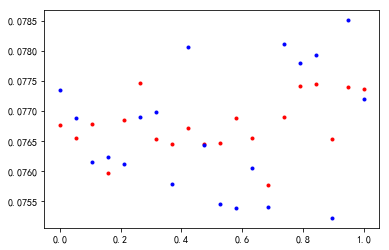

In [18]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.xlabel("Upper_quartile")
#plt.ylabel("电导率 s\m")
#plt.title("预测效果")'''
#plt.xlabel('时间/s')

x = np.linspace(0,1,20)
#x_tag=np.linspace(0,1000,6)
#plt.xticks(x_tag,group_labels, rotation=0)
plt.plot(x,LR.predict(X_test)[0:20],'r.',x,y_test[0:20],'b.')

In [14]:
compute_rmse(LR.predict(X_test), y_test)

0.0007171715808704012

In [15]:
compute_mae(LR.predict(X_test), y_test)

0.0005750193091546919

In [16]:
compute_R_Squared(LR.predict(X_test), y_test)

0.36504689872509

In [20]:
#搭建回归树
TREE=DecisionTreeRegressor()
TREE.fit(X_train, y_train)
TREE.predict(X_test)

array([0.07662514, 0.0764149 , 0.07662752, ..., 0.07735572, 0.07812524,
       0.07634951])

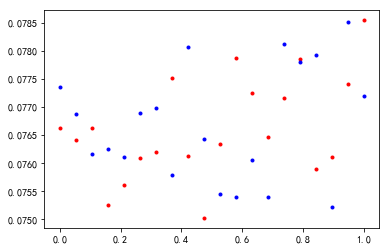

In [21]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.xlabel("Upper_quartile")
#plt.ylabel("电导率 s\m")
#plt.title("预测效果")'''
#plt.xlabel('时间/s')

x = np.linspace(0,1,20)
#x_tag=np.linspace(0,1000,6)
#plt.xticks(x_tag,group_labels, rotation=0)
plt.plot(x,TREE.predict(X_test)[0:20],'r.',x,y_test[0:20],'b.')

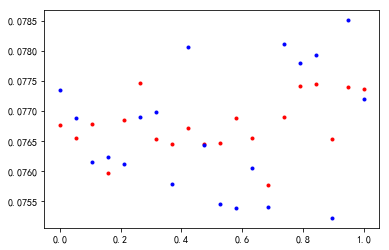

In [18]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.xlabel("Upper_quartile")
#plt.ylabel("电导率 s\m")
#plt.title("预测效果")'''
#plt.xlabel('时间/s')

x = np.linspace(0,1,20)
#x_tag=np.linspace(0,1000,6)
#plt.xticks(x_tag,group_labels, rotation=0)
plt.plot(x,LR.predict(X_test)[0:20],'r.',x,y_test[0:20],'b.')

In [18]:
compute_rmse(TREE.predict(X_test), y_test)

0.0010154397884606643

In [19]:
compute_mae(TREE.predict(X_test), y_test)

0.0008126386003386375

In [20]:
compute_R_Squared(TREE.predict(X_test), y_test)

-0.27292805613662807

In [46]:
#搭建NN模型
#自定义标准rmse mae r_square
def rmse(y_true, y_pred):
    return K.mean((y_true - y_pred) ** 2) ** 0.5

def mae(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

def r_square(y_true, y_pred):
    SSR = K.mean(K.square(y_pred-K.mean(y_true)),axis=-1)
    SST = K.mean(K.square(y_true-K.mean(y_true)),axis=-1)
    return SSR/SST

In [48]:
model=Sequential()
model.add(Dense(units=20,input_dim=5,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1))
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mse', optimizer=adam,metrics =[rmse,mae,r_square])
model.fit(X,y, batch_size=100, epochs=100,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 75us/step - loss: 4.8921e-04 - rmse: 0.0178 - mae: 0.0147 - r_square: 1237751542.7748 - val_loss: 6.3144e-05 - val_rmse: 0.0079 - val_mae: 0.0062 - val_r_square: 65899.2249
Epoch 2/100
8000/8000 [==============================] - 0s 8us/step - loss: 3.1301e-05 - rmse: 0.0055 - mae: 0.0043 - r_square: 31928890.8693 - val_loss: 1.8301e-05 - val_rmse: 0.0043 - val_mae: 0.0033 - val_r_square: 9325.8065
Epoch 3/100
8000/8000 [==============================] - 0s 9us/step - loss: 1.6164e-05 - rmse: 0.0040 - mae: 0.0031 - r_square: 1898950.1839 - val_loss: 1.4648e-05 - val_rmse: 0.0038 - val_mae: 0.0029 - val_r_square: 9778.1934
Epoch 4/100
8000/8000 [==============================] - 0s 8us/step - loss: 1.3002e-05 - rmse: 0.0036 - mae: 0.0028 - r_square: 33607.3912 - val_loss: 1.2117e-05 - val_rmse: 0.0035 - val_mae: 0.0026 - val_r_square: 10226.5687
Epoch 5/100
8000/8000 [============

Epoch 36/100
8000/8000 [==============================] - 0s 8us/step - loss: 7.8739e-07 - rmse: 8.8157e-04 - mae: 6.9786e-04 - r_square: 1253.0629 - val_loss: 8.2718e-07 - val_rmse: 9.0510e-04 - val_mae: 7.1881e-04 - val_r_square: 3910.8742
Epoch 37/100
8000/8000 [==============================] - 0s 8us/step - loss: 7.9932e-07 - rmse: 8.9000e-04 - mae: 7.0283e-04 - r_square: 1149.1063 - val_loss: 7.8274e-07 - val_rmse: 8.8088e-04 - val_mae: 6.9386e-04 - val_r_square: 377.5947
Epoch 38/100
8000/8000 [==============================] - 0s 8us/step - loss: 7.5575e-07 - rmse: 8.6470e-04 - mae: 6.8379e-04 - r_square: 3031.6124 - val_loss: 6.7948e-07 - val_rmse: 8.2050e-04 - val_mae: 6.4174e-04 - val_r_square: 436.4950
Epoch 39/100
8000/8000 [==============================] - 0s 8us/step - loss: 7.4575e-07 - rmse: 8.6017e-04 - mae: 6.8166e-04 - r_square: 126955.8207 - val_loss: 6.5792e-07 - val_rmse: 8.0748e-04 - val_mae: 6.3299e-04 - val_r_square: 796.8079
Epoch 40/100
8000/8000 [=========

Epoch 70/100
8000/8000 [==============================] - 0s 8us/step - loss: 6.8379e-07 - rmse: 8.2342e-04 - mae: 6.5817e-04 - r_square: 894.5566 - val_loss: 9.4985e-07 - val_rmse: 9.7239e-04 - val_mae: 7.9705e-04 - val_r_square: 9154.1401
Epoch 71/100
8000/8000 [==============================] - 0s 8us/step - loss: 8.3269e-07 - rmse: 9.0707e-04 - mae: 7.3378e-04 - r_square: 77690.5869 - val_loss: 6.2228e-07 - val_rmse: 7.8720e-04 - val_mae: 6.3392e-04 - val_r_square: 3065.3429
Epoch 72/100
8000/8000 [==============================] - 0s 9us/step - loss: 7.0037e-07 - rmse: 8.3290e-04 - mae: 6.6759e-04 - r_square: 1531.7989 - val_loss: 7.0152e-07 - val_rmse: 8.3409e-04 - val_mae: 6.5927e-04 - val_r_square: 1494.9204
Epoch 73/100
8000/8000 [==============================] - 0s 9us/step - loss: 6.5813e-07 - rmse: 8.0894e-04 - mae: 6.4655e-04 - r_square: 400409.3345 - val_loss: 7.0887e-07 - val_rmse: 8.4020e-04 - val_mae: 6.8131e-04 - val_r_square: 4538.5471
Epoch 74/100
8000/8000 [======

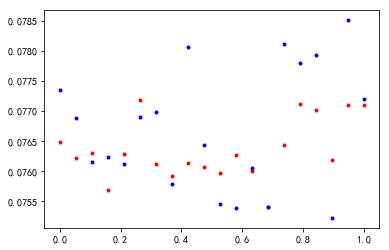

In [60]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.xlabel("Upper_quartile")
#plt.ylabel("电导率 s\m")
#plt.title("预测效果")'''
#plt.xlabel('时间/s')

x = np.linspace(0,1,20)
#x_tag=np.linspace(0,1000,6)
#plt.xticks(x_tag,group_labels, rotation=0)
plt.plot(x,model.predict(X_test)[0:20],'r.',x,y_test[0:20],'b.')

In [50]:
X

,average_value,standard_deviation,Dispersion_coefficient,mean_width,surface
0,0.456651,0.775938,0.698058,0.476385,0.509769
1,0.679335,0.175084,0.205934,0.563847,0.477798
2,0.596200,0.530078,0.459285,0.523143,0.484902
3,0.653207,0.574692,0.440299,0.491946,0.527531
4,0.679335,0.600012,0.434235,0.264130,0.804618
5,0.423694,0.475851,0.560856,0.629957,0.445826
6,0.473872,0.548913,0.562170,0.349706,0.820604
7,0.416865,0.362923,0.504916,0.457744,0.646536
8,0.595606,0.346080,0.360632,0.633116,0.397869
9,0.473278,0.597849,0.589075,0.712425,0.339254


In [59]:
X_test

,average_value,standard_deviation,Dispersion_coefficient,mean_width,surface
9394,0.598575,0.448946,0.413797,0.371218,0.714032
898,0.728325,0.435531,0.309178,0.398947,0.706927
2398,0.425178,0.418224,0.528530,0.445336,0.559503
5906,0.548397,0.573203,0.518691,0.802009,0.248668
2343,0.483967,0.699256,0.635733,0.535649,0.566607
8225,0.600950,0.690095,0.541869,0.331305,0.733570
5506,0.494952,0.490908,0.514806,0.532521,0.525755
6451,0.304038,0.408905,0.615985,0.642600,0.298401
2670,0.378563,0.536712,0.628281,0.554439,0.468917
3497,0.608967,0.326690,0.340147,0.346637,0.776199
